In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
df=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/cd/gh-pages/data/blood_pressure.csv",encoding = "ISO-8859-1")

In [32]:
df.head()

,patient,sex,agegrp,bp_before,bp_after
0,1,Male,30-45,143,153
1,2,Male,30-45,163,170
2,3,Male,30-45,153,168
3,4,Male,30-45,153,142
4,5,Male,30-45,146,141


In [33]:
df[['bp_before','bp_after']].describe()

,bp_before,bp_after
count,120.000000,120.000000
mean,156.450000,151.358333
std,11.389845,14.177622
min,138.000000,125.000000
25%,147.000000,140.750000
50%,154.500000,149.500000
75%,164.000000,161.000000
max,185.000000,185.000000


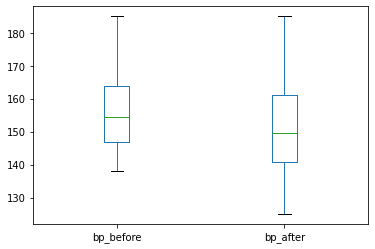

In [34]:
df[['bp_before', 'bp_after']].plot(kind='box')

In [35]:
#Verificando se a diferença segue a gaussiana
df['bp_difference'] = df['bp_before'] - df['bp_after']

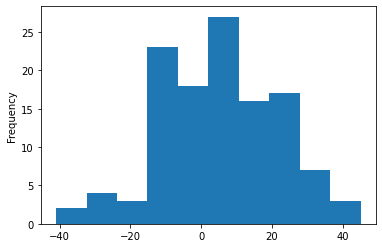

In [36]:
df['bp_difference'].plot(kind='hist')

In [73]:
#Shapiro-Wilk teste de normalidade (valor,p-value). Hipótese nula: a população é normalmente distribuída.
stats.shapiro(df['bp_difference'])

(0.9926842451095581, 0.7841846942901611)

In [ ]:
#Executando o teste t-test
stats.ttest_rel(df['bp_before'], df['bp_after'])

In [ ]:
#Checando simetria
df[['bp_difference']].plot(kind='box')

In [ ]:
stats.wilcoxon(df['bp_before'], df['bp_after'])

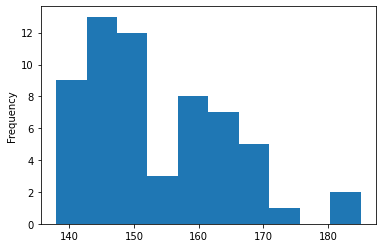

In [37]:
df[df['sex'] == 'Female']['bp_before'].plot(kind='hist')

In [38]:
stats.shapiro(df[df['sex'] == 'Female']['bp_before'])

(0.9277511835098267, 0.001596352318301797)

In [ ]:
df[df['sex'] == 'Male']['bp_before'].plot(kind='hist')

In [ ]:
stats.shapiro(df[df['sex'] == 'Male']['bp_before'])

In [ ]:
stats.mannwhitneyu(df[df['sex'] == 'Male']['bp_before'],df[df['sex'] == 'Female']['bp_before'])

In [ ]:
import seaborn as sns
data1 = df[df['sex'] == 'Female']['bp_after']
data2 = df[df['sex'] == 'Male']['bp_after']
sns.boxplot(data=[data1, data2])

In [95]:
houses=pd.read_csv("https://raw.githubusercontent.com/ProfLuciano/cd/gh-pages/data/recife.csv",encoding = "ISO-8859-1")
houses = houses[houses['price'] > 30000]
houses['price_m2'] = houses['price']/houses['area']
houses.head()

,price,latitude,longitude,bedrooms,area,pkspaces,bathrooms,ensuites,suburb,district,city,state,type,price_m2
1,330000,-8.029595,-34.900372,3.0,86.0,1.0,3.0,1.0,Tamarineira,Recife,Recife,Pernambuco,apart,3837.209302
2,255000,-8.037247,-34.890986,2.0,82.0,1.0,2.0,NaN,Encruzilhada,Recife,Recife,Pernambuco,apart,3109.756098
3,380000,-8.047562,-34.876964,3.0,95.0,2.0,3.0,1.0,Santo Amaro,Recife,Recife,Pernambuco,apart,4000.000000
4,300000,-8.053580,-34.908733,3.0,97.0,1.0,3.0,1.0,Madalena,Recife,Recife,Pernambuco,apart,3092.783505
5,320000,-8.026516,-34.917791,2.0,50.0,1.0,2.0,1.0,Casa Amarela,Recife,Recife,Pernambuco,apart,6400.000000


## Exercício 1: Verifique se existe diferença para imóveis à venda entre em termos de preço, preço m2 e área entre apartamentos e casas usando testes estatísticos e visualize as distribuições com boxplots.

### price

In [93]:
stats.mannwhitneyu(houses[houses['type'] == 'apart']['price'],houses[houses['type'] == 'house']['price'])

MannwhitneyuResult(statistic=36320.5, pvalue=0.04210920423317538)

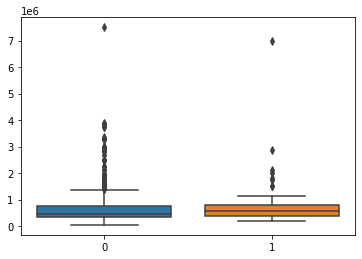

In [94]:
import seaborn as sns
data1 = houses[houses['type'] == 'apart']['price']
data2 = houses[houses['type'] == 'house']['price']
sns.boxplot(data=[data1, data2])

### price_m2

In [97]:
stats.mannwhitneyu(houses[houses['type'] == 'apart']['price_m2'],houses[houses['type'] == 'house']['price_m2'])

MannwhitneyuResult(statistic=18156.0, pvalue=6.741754203863054e-16)

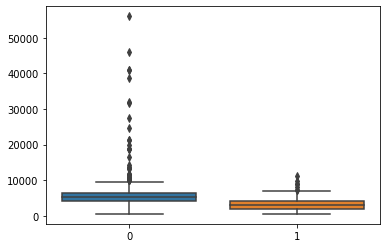

In [98]:
import seaborn as sns
data1 = houses[houses['type'] == 'apart']['price_m2']
data2 = houses[houses['type'] == 'house']['price_m2']
sns.boxplot(data=[data1, data2])

### area

In [100]:
stats.mannwhitneyu(houses[houses['type'] == 'apart']['area'],houses[houses['type'] == 'house']['area'])

MannwhitneyuResult(statistic=15447.5, pvalue=2.234166623776843e-19)

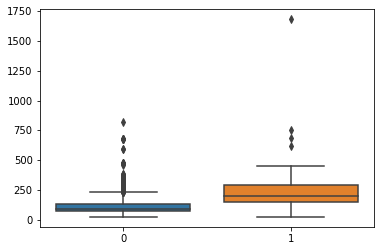

In [101]:
import seaborn as sns
data1 = houses[houses['type'] == 'apart']['area']
data2 = houses[houses['type'] == 'house']['area']
sns.boxplot(data=[data1, data2])

## Exercício 2: Realize a mesma análise comparando dois bairros que possuam um grande número de imóveis nos dados.

In [ ]:
houses.groupby('suburb')['suburb'].count()

In [105]:
# Boa Viagem e Santo Amaro são os que possuem mais imóveis
# Analisaremos os dois
stats.mannwhitneyu(houses[houses['suburb'] == 'Boa Viagem']['price'],houses[houses['suburb'] == 'Santo Amaro']['price'])

MannwhitneyuResult(statistic=7589.5, pvalue=0.05385725047211232)

In [106]:
stats.mannwhitneyu(houses[houses['suburb'] == 'Boa Viagem']['price_m2'],houses[houses['suburb'] == 'Santo Amaro']['price_m2'])

MannwhitneyuResult(statistic=7673.5, pvalue=0.0704150130328591)

In [107]:
stats.mannwhitneyu(houses[houses['suburb'] == 'Boa Viagem']['area'],houses[houses['suburb'] == 'Santo Amaro']['area'])

MannwhitneyuResult(statistic=6653.5, pvalue=0.0009037233644595358)